In [ ]:
from smach_utils2 import *

In [ ]:
tfBuffer = tf2.Buffer()

listener = tf2.TransformListener(tfBuffer)
b_tf=tf2.TransformBroadcaster()
b_st=tf2.StaticTransformBroadcaster()


In [ ]:
def write_tf(pose, q, child_frame , parent_frame='map',time=0):
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
def read_tf(t):
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [ ]:
res=segmentation_server.call()

In [ ]:
res

In [ ]:
poses=np.asarray(res.poses.data)

poses=poses.reshape((int(len(poses)/3) ,3     )      )

In [ ]:
head.set_named_target('neutral')

In [ ]:
#t=write_tf(res.poses.data,(0,0,0,1),'Target',"head_rgbd_sensor_depth_frame",0)
t=write_tf(poses[0,:],(0,0,0,1),'Target_tmp',"head_rgbd_sensor_depth_frame",0) ## CHOOSE A TARGET 

b_tf.sendTransform(t)
rospy.sleep(0.2)
tt=tfBuffer.lookup_transform('map','object_0',rospy.Time(0))
rospy.sleep(0.2)
tt
pose,quat= read_tf(tt)
t=write_tf(pose,(0,0,0,1),'Target')
b_st.sendTransform(t)


In [ ]:
head = moveit_commander.MoveGroupCommander('head')
#gripper =  moveit_commander.MoveGroupCommander('gripper')
arm=moveit_commander.MoveGroupCommander('arm')

In [ ]:
#whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
clear_octo_client()
arm_grasp_from_above = [0.3, -2.0, 0.0, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:
head.set_named_target('neutral')
head.go()
clear_octo_client()


In [ ]:
#
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]#
wb_gp.pose.position.z= pose[2]+0.3   ##Pre Grasp from above


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
if plan[0]:
    succ=whole_body.go()
else:
    print('No plan')

In [ ]:
succ

In [ ]:
t=tfBuffer.lookup_transform('hand_palm_link', 'Target',rospy.Time())

In [ ]:
pose,_=read_tf(t)
pose

In [ ]:
goal_p=whole_body.get_current_pose()
goal_p.pose.position.x=0.1
goal_p.pose.position.y=pose[1]
goal_p.pose.position.z=pose[2]+0.2
#goal_p.pose.orientation.w=quat[0]
#goal_p.pose.orientation.x=quat[1]
#goal_p.pose.orientation.y=quat[2]
#goal_p.pose.orientation.z=quat[3]



In [ ]:
whole_body.set_pose_target(goal_p)

In [ ]:
whole_body.plan()

In [ ]:
goal_p=whole_body.get_current_pose()

In [ ]:
whole_body.set_pose_target(goal_p)
whole_body.plan()

In [ ]:
whole_body.go()

In [ ]:
res.poses.data

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time())

In [ ]:
pose,quat=read_tf(t)

In [ ]:
goal_pose= Pose()

In [ ]:
goal_pose.position.x=pose[0]
goal_pose.position.y=pose[1]
goal_pose.position.z=pose[2]

In [ ]:
pose,goal_pose

In [ ]:
whole_body.get_current_pose()

In [ ]:
wb=whole_body.get_current_joint_values()

In [ ]:
wb[4]=0.1

In [ ]:
whole_body.go(wb)

In [ ]:
pose=whole_body.get_current_pose()

In [ ]:
type(pose.pose.orientation)

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
gp=whole_body.get_current_pose()

In [ ]:

gp.pose.orientation
pose=gp
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])

In [ ]:
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tfBuffer.lookup_transform('hand_palm_link','New:static_Target',rospy.Time(0))

In [ ]:
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)

In [ ]:
wb_gp=whole_body.get_current_pose()

In [ ]:
eu=tf.transformations.euler_from_quaternion((wb_gp.pose.orientation.w,wb_gp.pose.orientation.x,wb_gp.pose.orientation.y,wb_gp.pose.orientation.z))
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)
rotated=tf.transformations.quaternion_multiply(quat,rot_quat)



In [ ]:
wb_gp.pose.position.x-=0.1
wb_gp.pose.position.y+=0.1
wb_gp.pose.position.z-=0.1


In [ ]:
wb_gp.pose.orientation.w=rotated[0]
wb_gp.pose.orientation.x=rotated[1]
wb_gp.pose.orientation.y=rotated[2]
wb_gp.pose.orientation.z=rotated[3]

In [ ]:
whole_body.set_pose_target(wb_gp)

In [ ]:

plan=whole_body.plan()
plan

In [ ]:
if plan[0]:
    whole_body.go()

In [ ]:
whole_body.go()

In [ ]:
arm_grasp_from_above = [0.19263830140116414, -2.2668981568652917, -0.007358947463759424, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:

t=tfBuffer.lookup_transform('New:static_Target','hand_palm_link',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat
np.save('above_quat.npy',quat)

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
plan

In [ ]:

whole_body.go()

In [ ]:
wb_v=whole_body.get_current_joint_values()


In [ ]:
gripper = GRIPPER()

In [ ]:
gripper.close()

In [ ]:
gripper =  moveit_commander.MoveGroupCommander('gripper')

In [ ]:

|
tf_man.pub_static_tf()

In [ ]:
head.set_joint_values([0.0, -0.77])


In [ ]:
print ('rdy')

In [ ]:
brazo.set_named_target('go')
head.set_joint_values([0.0, -0.77])
res=segmentation_server.call()
if len(res.poses.data)==0: print( 'failed')
else:

    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  





    tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
    rospy.sleep(0.3)
    pose, _ =tf_man.getTF('target')
    tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


    head.set_named_target('neutral')

In [ ]:
poses=np.asarray(res.poses.data)
poses=poses.reshape((int(len(poses)/3) ,3     )      )  





tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO

In [ ]:
tf_man.change_ref_frame_tf(point_name='target', new_frame='map')


In [ ]:
pose, _ =tf_man.getTF('target')
tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


In [ ]:
head.set_named_target('neutral')

In [ ]:
 clear_octo_client()
#############################10 * 2 *np.pi / 360 ####pi /2
arm_grasp_from_above = [0.2, -1.57, -0.13 , -1.57, 0.0, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)   

In [ ]:
clear_octo_client()
pose, quat=tf_man.getTF('Target')

wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2

whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()

In [ ]:
pos,rot=tf_man.getTF(target_frame=,ref)
pos

In [ ]:
from smach_utils2 import *

In [ ]:
from smach_utils2 import *


In [ ]:
wb_gp=whole_body.get_current_pose()            
wb_gp.header.frame_id="Target"
wb_gp.pose.position.x=0.02669
wb_gp.pose.position.y=0.045
wb_gp.pose.position.z= 0.033
wb_gp.pose.orientation.w=-0.990
wb_gp.pose.orientation.x= 0.0246
wb_gp.pose.orientation.y= -0.0085
wb_gp.pose.orientation.z= 0.1345



In [ ]:
aaa

In [ ]:
from smach_ros import ActionServerWrapper

In [ ]:
res = speech_recog_server()

In [ ]:
res.data

#msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg

In [ ]:
if len(res.data.split(' '))>1:print(res.data.split(' ')[-1])    ### Number of words


In [ ]:
from ros_whisper_vosk.srv import SetGrammarVosk
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar(['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi'])  ##PRESET NAMES

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
msg

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg.data
if len(msg.data.split(' '))>1:print(msg.data.split(' ')[-1]) 

In [ ]:

res=get_keywords_speech(10)
res

In [ ]:
drinks=['coke','juice','beer', 'water', 'soda', 'wine']
names=['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
confirmation=['yes','no']
gram=drinks+names+confirmation

set_grammar(gram)  ##PRESET DRINKS


In [ ]:
res2 = get_keywords_speech(10)
if res2 in['yes','jack','juice']:print('chido',res2)
else: print ('chale',res2)

In [ ]:
set_grammar(['yes','no'])

In [ ]:
res2 in ['yes', 'no']

In [ ]:
res2='not'

In [ ]:
import matplotlib.pyplot as plt

#map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)

In [ ]:
map_msg.info.width

In [ ]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))



In [ ]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [ ]:
img_map[237,474]

In [ ]:
from smach_utils2 import *


In [ ]:
brazo.set_named_target()
head.set_joint_values([0,-1])


In [ ]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

In [ ]:
contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),contoured)

In [ ]:
pose

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]


In [ ]:
#FREE SPACE . SO IT IS A PLAUSIBLE HYPOTHESIS OF A TRASH OBJECT

In [ ]:
pose

In [ ]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(img_map)

In [ ]:
origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) 

In [ ]:
img_map[200,474]

In [ ]:
img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]


#img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]

In [ ]:
origin_map_img=[round(contoured.shape[0]*0.5) ,round(contoured.shape[1]*0.5)]
pose,_= tf_man.getTF('object_0')

contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),img_map)
plt.imshow(contoured)

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]#### Yes axes seem to be "flipped"

In [ ]:

contoured[origin_map_img[1],origin_map_img[0]]

In [ ]:
robot=get_robot_px()
draw_at(origin_map_img[0]+robot[0]+round(pose[0]/pix_per_m) ,origin_map_img[1] -robot[1] - round(pose[1]/pix_per_m),contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')

In [ ]:
contoured[origin_map_img[1]- round(pose[1]/pix_per_m),origin_map_img[0]- round(pose[0]/pix_per_m)]

In [ ]:
contoured[0,0]

In [ ]:
contoured[origin_map_img[0]- round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m)]

In [ ]:
c=point_to_px(pose[0],pose[1])
robot=get_robot_px()
draw_at(1024+robot[1]+c[0],1024+robot[0]+c[1],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')


In [ ]:
contoured[c[0]+1024,c[1]+1024]

In [ ]:

check_point_map(pose[0],pose[1])

In [1]:
import matplotlib.pyplot as plt
from smach_utils2 import *

def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


[ WARN] [1702922334.523283712]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3955.239000 according to authority /pose_integrator
[ WARN] [1702922335.431122727]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3955.577000 according to authority /pose_integrator


In [2]:
broadcaster = tf2_ros.TransformBroadcaster()
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)    
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def correct_points(points_msg):

    # Function that transforms Point Cloud reference frame from  head, to map. (i.e. sensor coords to map coords )
    # img= correct_points() (Returns rgbd depth corrected image)    
    #points msg in 
    #data = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)
    

    np_data=ros_numpy.numpify(points_msg)

    try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
    except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')

    #trans,rot=tf_listener.lookupTransform('/map', '/head_rgbd_sensor_rgb_frame', rospy.Time(0))
    #print ("############TF1",trans,rot)
    eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
    t=TransformStamped()
    rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
    #rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
    t.header.stamp = points_msg.header.stamp
    t.transform.rotation.x = rot[0]
    t.transform.rotation.y = rot[1]
    t.transform.rotation.z = rot[2]
    t.transform.rotation.w = rot[3]
    cloud_out = do_transform_cloud(points_msg, t)
    np_corrected=ros_numpy.numpify(cloud_out)
    corrected=np_corrected.reshape(np_data.shape)
    img= np.copy(-corrected['z'])
    img[np.isnan(img)]=2
    img_corrected = np.where((img<trans[2]*0.96) ,img,5)
    #Returns img with xyz info  and points datastructure ( see numpify a ptcloud2)
    return img_corrected , corrected

In [4]:
#############################################
#points_data = ros_numpy.numpify(points_msg)    
#image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
#image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
#image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
#rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
##
_,corrected=correct_points(points_msg)  ### aplica la transformada de la camara para corregir la perspectiva
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)   
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
#print (bin_edges,histogram[:-1].argmax(), histogram[:-1].argmax())
plane_height= (trans)+bin_edges[histogram[:-1].argmax()]
print(plane_height, 'plane_height')
################################

[ WARN] [1702922336.569802940]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator
[ WARN] [1702922336.569847970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator
[ WARN] [1702922336.569875194]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator
[ WARN] [1702922336.569901801]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator
[ WARN] [1702922336.569928075]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator
[ WARN] [1702922336.569956299]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3956.120000 according to authority /pose_integrator


0.3958891362308271 plane_height


[ WARN] [1702922340.649889842]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator
[ WARN] [1702922340.649934751]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator
[ WARN] [1702922340.649960913]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator
[ WARN] [1702922340.649985717]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator
[ WARN] [1702922340.650010473]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator
[ WARN] [1702922340.650034705]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3957.994000 according to authority /pose_integrator


In [5]:
points_msg = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)


[ WARN] [1702922345.575477548]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator
[ WARN] [1702922345.575534189]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator
[ WARN] [1702922345.575585616]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator
[ WARN] [1702922345.575623148]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator
[ WARN] [1702922345.575649645]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator
[ WARN] [1702922345.575673082]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.310000 according to authority /pose_integrator


[ WARN] [1702922346.604098604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator
[ WARN] [1702922346.604144272]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator
[ WARN] [1702922346.604170786]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator
[ WARN] [1702922346.604197224]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator
[ WARN] [1702922346.604229266]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator
[ WARN] [1702922346.604266352]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3960.758000 according to authority /pose_integrator


0.39585749259338954 plane_height


[ WARN] [1702922349.456868447]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator
[ WARN] [1702922349.456913577]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator
[ WARN] [1702922349.456947943]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator
[ WARN] [1702922349.456981065]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator
[ WARN] [1702922349.457014983]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator
[ WARN] [1702922349.457052317]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3961.959000 according to authority /pose_integrator


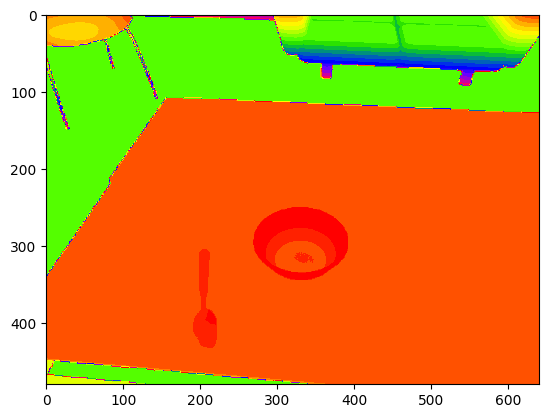

In [6]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
im_corrected,corrected=correct_points(points_msg)  ### aplica la transformada de la camara para corregir la perspectiva
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)   
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
#print (bin_edges,histogram[:-1].argmax(), histogram[:-1].argmax())
plane_height= (trans)+bin_edges[histogram[:-1].argmax()]
print(plane_height, 'plane_height')
plt.imshow(im_corrected,cmap='prism')


In [26]:
cc=[np.mean(corrected['x'][248:340,273:394]),
np.mean(corrected['y'][248:340,273:394]),
np.mean(corrected['z'][248:340,273:394]) 
   ]

In [27]:
cc

[-0.020181464, 0.5471835, -0.549639]

[ WARN] [1702923221.215729552]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.215769636]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.215795162]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.215817068]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.215838692]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.215859590]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4357.114000 according to authority /pose_integrator
[ WARN] [1702923221.45

[ WARN] [1702923249.771389437]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923249.771435847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923249.771471949]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923249.771513990]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923249.771553459]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923249.771585757]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4369.846000 according to authority /pose_integrator
[ WARN] [1702923251.25

[ WARN] [1702923275.036116668]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.036173932]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.036218179]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.036253296]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.036295360]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.036328046]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4381.010000 according to authority /pose_integrator
[ WARN] [1702923275.99

[ WARN] [1702923302.699328791]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923302.699374970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923302.699410006]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923302.699445321]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923302.699479867]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923302.699519053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4392.923000 according to authority /pose_integrator
[ WARN] [1702923303.44

[ WARN] [1702923311.369646539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.369700897]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.369738193]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.369775508]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.369808288]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.369838765]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4396.849000 according to authority /pose_integrator
[ WARN] [1702923311.70

[ WARN] [1702923318.483365682]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.483423417]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.483464129]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.483501817]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.483538260]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.483578482]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4400.011000 according to authority /pose_integrator
[ WARN] [1702923318.71

[ WARN] [1702923347.519250306]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923347.519313026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923347.519369227]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923347.519414287]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923347.519455665]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923347.519493539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4413.002000 according to authority /pose_integrator
[ WARN] [1702923350.69

[ WARN] [1702923365.835354136]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923365.835407761]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923365.835447915]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923365.835491188]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923365.835527637]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923365.835561554]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4421.333000 according to authority /pose_integrator
[ WARN] [1702923369.23

[ WARN] [1702923385.365813243]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923385.365867845]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923385.365910079]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923385.365947981]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923385.365986239]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923385.366024482]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4430.009000 according to authority /pose_integrator
[ WARN] [1702923387.75

[ WARN] [1702923409.517714151]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923409.517780197]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923409.517838802]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923409.517877814]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923409.517916045]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923409.517957418]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4440.860000 according to authority /pose_integrator
[ WARN] [1702923410.09

[ WARN] [1702923430.104271358]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923430.104331338]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923430.104376141]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923430.104410302]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923430.104449852]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923430.104492580]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4450.168000 according to authority /pose_integrator
[ WARN] [1702923433.51

[ WARN] [1702923438.903564405]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923438.903618696]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923438.903662433]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923438.903716917]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923438.903753516]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923438.903794041]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4454.330000 according to authority /pose_integrator
[ WARN] [1702923441.24

[ WARN] [1702923447.532763553]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923447.532815887]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923447.532842822]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923447.532867033]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923447.532890591]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923447.532914452]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4458.288000 according to authority /pose_integrator
[ WARN] [1702923456.08

[ WARN] [1702923466.141510544]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923466.141562634]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923466.141591970]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923466.141623157]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923466.141664168]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923466.141695597]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4466.594000 according to authority /pose_integrator
[ WARN] [1702923467.92

shutdown request: [/smach] Reason: new node registered with same name


[ WARN] [1702923105.028478625]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator
[ WARN] [1702923105.028531753]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator
[ WARN] [1702923105.028558537]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator
[ WARN] [1702923105.028581879]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator
[ WARN] [1702923105.028612167]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator
[ WARN] [1702923105.028637135]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4304.960000 according to authority /pose_integrator


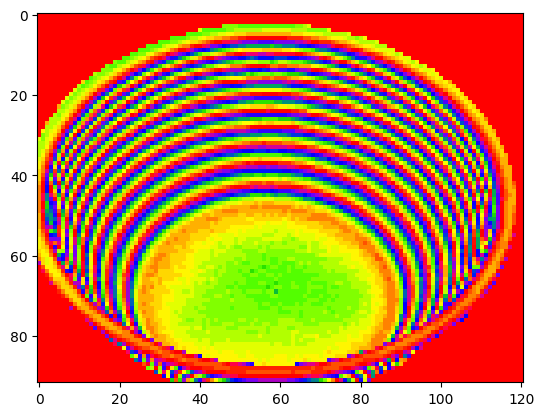

[ WARN] [1702923107.096311385]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923107.096373548]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923107.096416365]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923107.096457208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923107.096507442]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923107.096550821]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4305.849000 according to authority /pose_integrator
[ WARN] [1702923109.41

[ WARN] [1702923125.971648294]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923125.971692044]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923125.971718214]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923125.971750691]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923125.971797133]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923125.971831071]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4314.363000 according to authority /pose_integrator
[ WARN] [1702923130.42

[ WARN] [1702923133.295458692]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923133.295514402]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923133.295554760]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923133.295601048]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923133.295643897]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923133.295686854]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4317.745000 according to authority /pose_integrator
[ WARN] [1702923134.63

[ WARN] [1702923164.808389542]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923164.808429368]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923164.808454193]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923164.808488891]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923164.808522893]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923164.808555574]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4331.621000 according to authority /pose_integrator
[ WARN] [1702923165.05

In [24]:
plt.imshow(corrected['z'][248:340,273:394],cmap='prism')


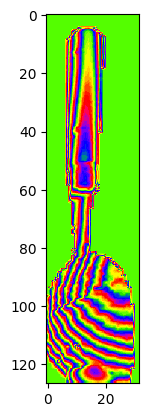

[ WARN] [1702922709.143733264]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922709.143787191]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922709.143823022]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922709.143863112]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922709.143900033]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922709.143937651]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4123.982000 according to authority /pose_integrator
[ WARN] [1702922712.07

[ WARN] [1702922720.232756643]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.232804517]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.232842481]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.232879140]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.232915184]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.232952521]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4128.960000 according to authority /pose_integrator
[ WARN] [1702922720.87

[ WARN] [1702922749.201055310]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922749.201104530]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922749.201140570]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922749.201173778]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922749.201207072]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922749.201237846]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4141.754000 according to authority /pose_integrator
[ WARN] [1702922751.21

In [15]:
plt.imshow(im_corrected[300:427,192:224],cmap='prism')


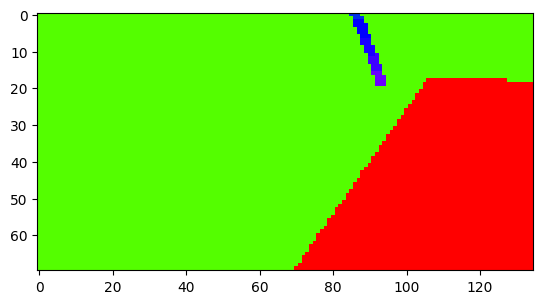

[ WARN] [1702922669.453042297]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922669.453096603]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922669.453128575]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922669.453158436]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922669.453183604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922669.453207558]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4106.139000 according to authority /pose_integrator
[ WARN] [1702922670.04

[ WARN] [1702922680.930755665]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922680.930801726]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922680.930834439]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922680.930859224]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922680.930883509]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922680.930908564]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4111.282000 according to authority /pose_integrator
[ WARN] [1702922681.07

[ WARN] [1702922690.391254499]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922690.391295697]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922690.391326988]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922690.391368216]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922690.391395059]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922690.391418096]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4115.488000 according to authority /pose_integrator
[ WARN] [1702922691.22

In [14]:
plt.imshow(im_corrected[90:160,50:185],cmap='prism')


In [23]:
im_corrected[0,0]

[ WARN] [1702923012.207608016]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator
[ WARN] [1702923012.207661726]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator
[ WARN] [1702923012.207697727]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator
[ WARN] [1702923012.207734652]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator
[ WARN] [1702923012.207768469]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator
[ WARN] [1702923012.207807068]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4262.227000 according to authority /pose_integrator


0.58870137

[ WARN] [1702923015.490386698]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923015.490430326]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923015.490462200]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923015.490493499]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923015.490522903]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923015.490551757]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4263.695000 according to authority /pose_integrator
[ WARN] [1702923016.84

[ WARN] [1702923031.860183075]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923031.860233267]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923031.860305707]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923031.860344684]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923031.860384752]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923031.860426488]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4271.165000 according to authority /pose_integrator
[ WARN] [1702923032.36

[ WARN] [1702923040.305827218]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923040.305867527]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923040.305891284]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923040.305921024]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923040.305959254]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923040.305982098]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4275.198000 according to authority /pose_integrator
[ WARN] [1702923041.42

[ WARN] [1702923049.032402100]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.032443385]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.032472472]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.032506860]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.032545563]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.032585402]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4279.245000 according to authority /pose_integrator
[ WARN] [1702923049.47

[ WARN] [1702923063.717347512]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923063.717401748]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923063.717433211]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923063.717463969]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923063.717493651]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923063.717529852]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4286.206000 according to authority /pose_integrator
[ WARN] [1702923064.28

[ WARN] [1702923077.963489405]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923077.963541722]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923077.963584677]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923077.963620554]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923077.963644649]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923077.963667174]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4292.593000 according to authority /pose_integrator
[ WARN] [1702923078.05

[ WARN] [1702923082.513818490]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923082.513878467]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923082.513922179]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923082.513975210]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923082.514018013]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923082.514060371]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4294.699000 according to authority /pose_integrator
[ WARN] [1702923083.52

[ WARN] [1702923098.445313579]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923098.445369256]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923098.445407193]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923098.445442215]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923098.445476208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923098.445515377]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4302.097000 according to authority /pose_integrator
[ WARN] [1702923103.97

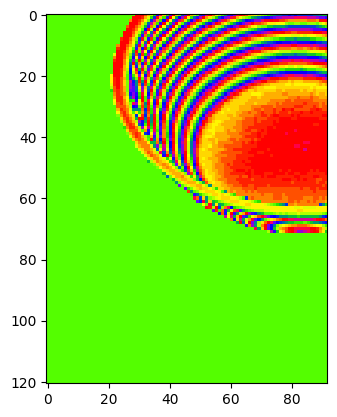

[ WARN] [1702922427.020480142]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.020524920]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.020551034]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.020574536]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.020596497]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.020626050]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 3996.943000 according to authority /pose_integrator
[ WARN] [1702922427.73

[ WARN] [1702922437.628699971]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922437.628752221]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922437.628787611]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922437.628820561]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922437.628852223]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922437.628896606]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4001.767000 according to authority /pose_integrator
[ WARN] [1702922438.65

[ WARN] [1702922453.031232370]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922453.031290162]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922453.031317460]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922453.031340681]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922453.031363179]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922453.031384979]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4008.685000 according to authority /pose_integrator
[ WARN] [1702922455.79

[ WARN] [1702922472.674416730]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator
[ WARN] [1702922472.674471638]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator
[ WARN] [1702922472.674517741]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator
[ WARN] [1702922472.674564767]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator
[ WARN] [1702922472.674599907]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator
[ WARN] [1702922472.674643850]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 4017.451000 according to authority /pose_integrator


In [8]:
plt.imshow(im_corrected[273:394,248:340],cmap='prism')


In [ ]:
thres_floor=0.01
im_corrected = np.where((zs_no_nans >-trans+thres_floor+plane_height),zs_no_nans,1)
plt.imshow(im_corrected)

In [ ]:
-trans-thres_floor+plane_height

In [ ]:
im_corrected[300:350,500:550]

In [ ]:
plt.imshow(im_corrected)

In [ ]:
plane_height= (trans)+bin_edges[histogram[:-1].argmax()+1]
img_corrected = np.where((-zs_no_nans < (trans*0.999)-plane_height-thres_t),zs_no_nans,1)

In [ ]:
corrected['z'][200:300,500:600]

In [ ]:
plt.imshow(corrected['z'])

In [ ]:
np_data=ros_numpy.numpify(points_msg)

try:
    trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())

    trans,rot=read_tf(trans)
    #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    print ( 'No head TF FOUND')
eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
t=TransformStamped()
rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
#rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
t.header.stamp = points_msg.header.stamp
t.transform.rotation.x = rot[0]
t.transform.rotation.y = rot[1]
t.transform.rotation.z = rot[2]
t.transform.rotation.w = rot[3]
cloud_out = do_transform_cloud(points_msg, t)
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(np_data.shape)
img= np.copy(-corrected['z'])
img[np.isnan(img)]=2
img_corrected = np.where((img<trans[2]*0.96) ,img,5)
plt.imshow(img_corrected)

In [ ]:
brazo.set_named_target('go')

In [ ]:
plt.imshow(np_data['z'])

In [ ]:
 contours, hierarchy = cv2.findContours(img_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=0
cents=[]
points=[]
points_c=[]
images=[]
for i, contour in enumerate(contours):
    
    area = cv2.contourArea(contour)
    if area<100 or area >10000:pass
    else:
        
        M = cv2.moments(contour)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print (cv2.contourArea(contour))
        boundRect = cv2.boundingRect(contour)
        image_aux= image[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        images.append(image_aux)
        image_aux= img_corrected[boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]]
        mask=np.where(image_aux!=5)
        npmask=np.asarray(mask).T
        
        rgb_image=cv2.rectangle(rgb_image,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (255,255,0), 2)
        iim=cv2.drawContours(rgb_image, contour, -1, (0,255,0), 10)
        

In [ ]:
plt.imshow(iim)

In [ ]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        print(ix)
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((np_data['x'][boundRect[1]+ix,boundRect[0]+iy],np_data['y'][boundRect[1]+ix,boundRect[0]+iy],np_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            #print (xyz)
            xyz.append(aux)


In [ ]:
i=0
x,y,z=np.asarray(xyz).mean(axis=0)
if np.isnan(x) or np.isnan(y) or np.isnan(z):
    print('nan')
else:
    t=write_tf(    (x,y,z), (0,0,0,1), 'Object'+str(i), "head_rgbd_sensor_rgb_frame"   )  
broadcaster.sendTransform(t)

In [ ]:
plt.imshow(corrected['z'][boundRect[1]:boundRect[1]+boundRect[3],boundRect[0]:boundRect[0]+boundRect[2]])

In [ ]:
xyz=[]
if len (npmask)>0:
    for a in npmask:
        ix,iy=a[0],a[1]
        #aux=(np.asarray((points_data['x'][boundRect[1]+ix,boundRect[0]+iy],points_data['y'][boundRect[1]+ix,boundRect[0]+iy],points_data['z'][boundRect[1]+ix,boundRect[0]+iy])))
        aux=(np.asarray((corrected['x'][boundRect[1]+ix,boundRect[0]+iy],corrected['y'][boundRect[1]+ix,boundRect[0]+iy],corrected['z'][boundRect[1]+ix,boundRect[0]+iy])))
        print (aux)
        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                'reject point'
        else:
            xyz.append(aux)

In [ ]:
np.asarray(xyz).mean(axis=0)

In [ ]:
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    

In [ ]:
zs_no_nans=np.where(~np.isnan(corrected['z']),corrected['z'],1)
histogram, bin_edges =(np.histogram(zs_no_nans, bins=100))
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z
plane_height= (trans)+bin_edges[histogram[:-1].argmax()+1]
print(plane_height, 'plane_height')


In [ ]:
t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
trans=t.transform.translation.z


# Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
img_corrected = np.where((zs_no_nans >-trans-0.03),zs_no_nans,1)

In [ ]:
corrected['z'][200,200]

In [ ]:
img_corrected

In [ ]:
plane_height

In [ ]:
for i, contour in enumerate(contours):
    boundRect = cv2.boundingRect(contour)

In [ ]:
img_corrected

In [ ]:
import matplotlib.pyplot as plt

contours, hierarchy = cv2.findContours(im_corrected.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
def segment_floor(points_data,zs_no_nans,obj_hMax=0.85,obj_lMax=1.5,thres_floor=0.03):
    # obj_hMax -> altura maxima para objetos para segmentar
    # obj_lMax -> distancia de objetos maxima para segmentar

    # Quita piso y mayor a una cierta altura
    t = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
    trans=t.transform.translation.z
    
    # Quito piso desde altura robot(sensor) + un threshold (hacia abajo) -> thres_floor
    img_corrected = np.where((zs_no_nans >-trans-thres_floor),zs_no_nans,1)
    # Quito objetos mayores a una altura -> obj_hMax
    img_corrected = np.where((img_corrected < -obj_hMax),img_corrected,1)
    

    # Quita objetos lejanos
    ls_no_nans=np.where(~np.isnan(points_data['z']),points_data['z'],5)
    
    lZ_no_nans=np.where(ls_no_nans<obj_lMax,ls_no_nans,5)
    
    # Con esto, quita en z los que en X (alturas) esten con 5
    for r in range(img_corrected.shape[0]):
        for c in range(img_corrected.shape[1]):
            if lZ_no_nans[r,c]>=5:
                img_corrected[r,c]=1
    
    return img_corrected


In [ ]:
plt.imshow(corrected['z'])

In [ ]:
corrected['z'][200,200]

In [ ]:
head.set_joint_values([0,-0.7])

In [ ]:
tf_man.getTF('object_0')

In [ ]:
point_name=f'object_{i}'
tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')

In [ ]:
player_pose=[0.3, -0.87, 0.0, -0.75, -0.03, 0.0]


In [ ]:
arm.set_joint_value_target(player_pose)

In [ ]:
plan=arm.plan()

In [ ]:
arm.go()

In [ ]:
arm.get_current_joint_values()

In [ ]:
omni_base.move_base(known_location='room2')

In [ ]:
head.set_joint_values([0,-0.7])